In [15]:
import torch
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cmap = 'plasma'

In [16]:
# folder_name = 'localized_N_100_c_3_mu_0.0_num_delta_10_num_input_10_num_trials_10_b0_0.5_b1_0.5'  # Replace with your folder name
folder_name = 'Untitled'
path = os.path.join('..', 'data', folder_name)

In [17]:
# Load parameters from the JSON file
param_file_path = os.path.join(path, 'parameters.json')
with open(param_file_path, 'r') as f:
    params = json.load(f)

# Extract parameters
N = params['N']
num_tasks = params['num_tasks']
num_delta = params['num_delta']
num_input = params['num_input']
num_trials = params['num_trials']
delta_range = np.array(params['delta_range'])
input_range = np.array(params['input_range'])

In [47]:
bool_stable = torch.load(os.path.join(path, f'bool_stable.pt'))
spectral_radius = torch.load(os.path.join(path, f'spectral_radius.pt'))
norm_fixed_point_y = torch.load(os.path.join(path, f'norm_fixed_point_y.pt'))
norm_fixed_point_a = torch.load(os.path.join(path, f'norm_fixed_point_a.pt'))
actual_fixed_point_y = torch.load(os.path.join(path, f'actual_fixed_point_y.pt'))
actual_fixed_point_a = torch.load(os.path.join(path, f'actual_fixed_point_a.pt'))
first_order_perturb_y = torch.load(os.path.join(path, f'first_order_perturb_y.pt'))
first_order_perturb_a = torch.load(os.path.join(path, f'first_order_perturb_a.pt'))
# eigvals_J = torch.load(os.path.join(path, f'eigvals_J.pt'))

In [48]:
assert torch.all(bool_stable != -1)
assert torch.all(~torch.isnan(spectral_radius))

bool_stable = bool_stable.bool()
percent_stable = bool_stable.float().mean(dim=2) * 100

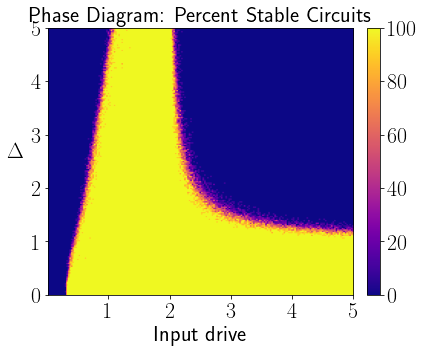

In [49]:
plt.figure(figsize=(6, 5))
norm = mcolors.Normalize(vmin=0, vmax=100, clip=False)
plt.imshow(percent_stable, extent=[input_range.min(), input_range.max(), delta_range.min(), delta_range.max()],
           origin='lower', aspect='auto', cmap=cmap, norm=norm)
colorbar = plt.colorbar(fraction=0.046, pad=0.04)
colorbar.ax.tick_params(labelsize=22)
colorbar.ax.set_ylabel(r"% stable", fontsize=22, rotation=0, labelpad=30)
plt.xlabel('Input drive', fontsize=22)
plt.ylabel(r'$\Delta$', fontsize=22, rotation=0, labelpad=15)
plt.title("Phase Diagram: Percent Stable Circuits", fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.show()

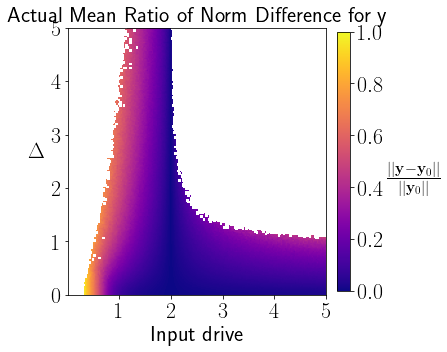

In [50]:
norm = mcolors.Normalize(vmin=0, vmax=1, clip=False)
y_ratio = torch.norm(norm_fixed_point_y - actual_fixed_point_y, dim=3) / torch.norm(norm_fixed_point_y, dim=3)
y_ratio_mean = y_ratio.mean(dim=2)
plt.figure(figsize=(6, 5))
plt.imshow(y_ratio_mean, extent=[input_range.min(), input_range.max(), delta_range.min(), delta_range.max()],
           origin='lower', aspect='auto', cmap=cmap, norm=norm)
colorbar = plt.colorbar(fraction=0.046, pad=0.04)
colorbar.ax.tick_params(labelsize=22)
colorbar.ax.set_ylabel(r"$\frac{||\mathbf{y}-\mathbf{y}_0||}{||\mathbf{y}_0||}$", fontsize=22, rotation=0, labelpad=30)
plt.xlabel('Input drive', fontsize=22)
plt.ylabel(r'$\Delta$', fontsize=22, rotation=0, labelpad=15)
plt.title("Actual Mean Ratio of Norm Difference for y", fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.show()

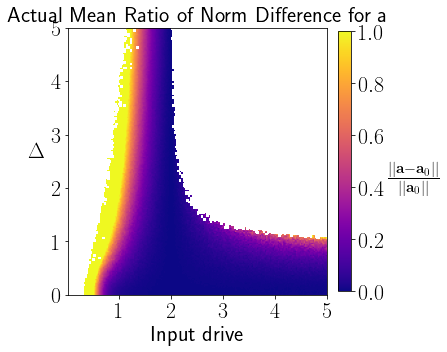

In [51]:
norm = mcolors.Normalize(vmin=0, vmax=1, clip=False)
a_ratio = torch.norm(norm_fixed_point_a - actual_fixed_point_a, dim=3) / torch.norm(norm_fixed_point_a, dim=3)
a_ratio_mean = a_ratio.mean(dim=2)
plt.figure(figsize=(6, 5))
plt.imshow(a_ratio_mean, extent=[input_range.min(), input_range.max(), delta_range.min(), delta_range.max()],
           origin='lower', aspect='auto', cmap=cmap, norm=norm)
colorbar = plt.colorbar(fraction=0.046, pad=0.04)
colorbar.ax.tick_params(labelsize=22)
colorbar.ax.set_ylabel(r"$\frac{||\mathbf{a}-\mathbf{a}_0||}{||\mathbf{a}_0||}$", fontsize=22, rotation=0, labelpad=30)
plt.xlabel('Input drive', fontsize=22)
plt.ylabel(r'$\Delta$', fontsize=22, rotation=0, labelpad=15)
plt.title("Actual Mean Ratio of Norm Difference for a", fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.show()

In [ ]:
norm = mcolors.Normalize(vmin=0, vmax=1, clip=False)
y_mean = torch.norm(actual_fixed_point_y, dim=3).mean(dim=2)
plt.figure(figsize=(6, 5))
plt.imshow(y_mean, extent=[input_range.min(), input_range.max(), delta_range.min(), delta_range.max()],
           origin='lower', aspect='auto', cmap=cmap, norm=norm)
colorbar = plt.colorbar(fraction=0.046, pad=0.04)
colorbar.ax.tick_params(labelsize=22)
colorbar.ax.set_ylabel(r"$||\mathbf{y}||$", fontsize=22, rotation=0, labelpad=30)
plt.xlabel('Input drive', fontsize=22)
plt.ylabel(r'$\Delta$', fontsize=22, rotation=0, labelpad=15)
plt.title("Norm of y", fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.show()

In [ ]:
norm = mcolors.Normalize(vmin=0, vmax=1, clip=False)
a_mean = torch.norm(actual_fixed_point_a, dim=3).mean(dim=2)
plt.figure(figsize=(6, 5))
plt.imshow(a_mean, extent=[input_range.min(), input_range.max(), delta_range.min(), delta_range.max()],
           origin='lower', aspect='auto', cmap=cmap, norm=norm)
colorbar = plt.colorbar(fraction=0.046, pad=0.04)
colorbar.ax.tick_params(labelsize=22)
colorbar.ax.set_ylabel(r"$||\mathbf{a}||$", fontsize=22, rotation=0, labelpad=30)
plt.xlabel('Input drive', fontsize=22)
plt.ylabel(r'$\Delta$', fontsize=22, rotation=0, labelpad=15)
plt.title("Norm of a", fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.show()

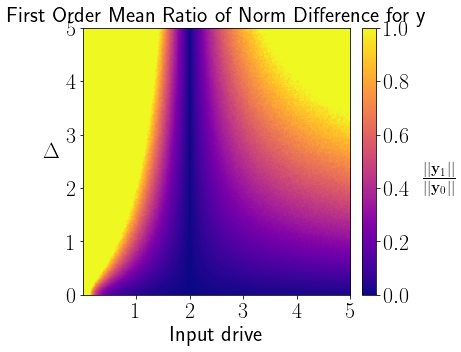

In [52]:
norm = mcolors.Normalize(vmin=0, vmax=1, clip=False)

# y_ratio = torch.norm(first_order_perturb_y, dim=3) / torch.norm(norm_fixed_point_y, dim=3)
# y_ratio_mean = y_ratio.mean(dim=2)

first_order_perturb_y = first_order_perturb_y.to(torch.float32)
norm_fixed_point_y = norm_fixed_point_y.to(torch.float32)
y_ratio = torch.norm(first_order_perturb_y, dim=3) ** 2 / torch.norm(norm_fixed_point_y, dim=3) ** 2
y_ratio_mean = torch.sqrt(y_ratio.mean(dim=2))

plt.figure(figsize=(6, 5))
plt.imshow(y_ratio_mean, extent=[input_range.min(), input_range.max(), delta_range.min(), delta_range.max()],
           origin='lower', aspect='auto', cmap=cmap, norm=norm)
colorbar = plt.colorbar(fraction=0.046, pad=0.04)
colorbar.ax.tick_params(labelsize=22)
colorbar.ax.set_ylabel(r"$\frac{||\mathbf{y}_1||}{||\mathbf{y}_0||}$", fontsize=22, rotation=0, labelpad=30)
plt.xlabel('Input drive', fontsize=22)
plt.ylabel(r'$\Delta$', fontsize=22, rotation=0, labelpad=15)
plt.title("First Order Mean Ratio of Norm Difference for y", fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.show()

In [53]:
temp = y_ratio_mean

In [54]:
torch.sum(torch.abs(y_ratio_mean - temp))

tensor(0.)

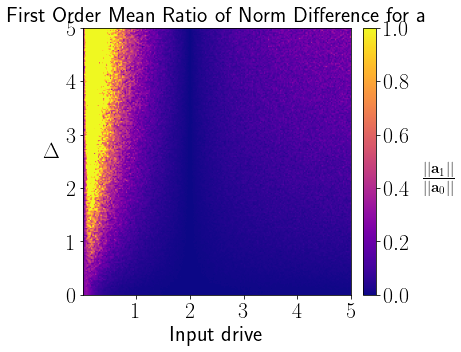

In [55]:
norm = mcolors.Normalize(vmin=0, vmax=1, clip=False)
a_ratio = torch.norm(first_order_perturb_a, dim=3) / torch.norm(norm_fixed_point_a, dim=3)
a_ratio_mean = a_ratio.mean(dim=2)
plt.figure(figsize=(6, 5))
plt.imshow(a_ratio_mean, extent=[input_range.min(), input_range.max(), delta_range.min(), delta_range.max()],
           origin='lower', aspect='auto', cmap=cmap, norm=norm)
colorbar = plt.colorbar(fraction=0.046, pad=0.04)
colorbar.ax.tick_params(labelsize=22)
colorbar.ax.set_ylabel(r"$\frac{||\mathbf{a}_1||}{||\mathbf{a}_0||}$", fontsize=22, rotation=0, labelpad=30)
plt.xlabel('Input drive', fontsize=22)
plt.ylabel(r'$\Delta$', fontsize=22, rotation=0, labelpad=15)
plt.title("First Order Mean Ratio of Norm Difference for a", fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.show()

Code to plot Flaviano's solution.

In [4]:
import torch 
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
N = 100
b0 = 0.5 * torch.ones(N)
b1 = 0.5 * torch.ones(N)
sigma = torch.tensor([0.1])

In [6]:
z = torch.linspace(0, 1, 100)
mus = [0.0, 1.0, 5.0]
deltas = torch.zeros(3, 100)

In [8]:
# for different mus 
for i, mu in enumerate(mus):
    deltas[i] = torch.sqrt((b1 * torch.sqrt(sigma ** 2 + z ** 2) / (1 - b1 * torch.sqrt(sigma ** 2 + z ** 2))) ** 2 - mu ** 2 * (sigma ** 2 / (sigma ** 2 + z ** 2)) ** 2) 

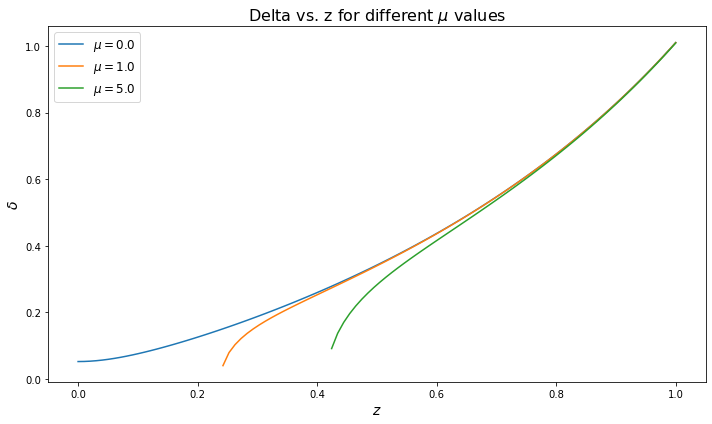

In [10]:
plt.figure(figsize=(10, 6))
for i, mu in enumerate(mus):
    plt.plot(z.numpy(), deltas[i].numpy(), label=f'$\mu = {mu}$')

# Customizing the plot
plt.title('Delta vs. z for different $\mu$ values', fontsize=16)
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$\delta$', fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()